In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix 


In [2]:
df = pd.read_csv('../cleaned_data/final_df.csv', index_col = 0)
pd.set_option('display.max_columns', None)

In [3]:
df

,Month,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,-1.533495,-0.932368,12,-0.796143,-0.979334,-0.787182,-1.376770,0.005316,128,-1.248565,-1.070927,0.077172,-0.538606,1,-0.590592,-1.054430,0.522998,1,-0.540759,-0.267683,2,0.010108,0
1,-0.659654,-0.932368,12,-0.796143,-0.979334,-0.787182,-1.376770,0.005316,128,-1.248565,-1.070927,0.077172,-0.538606,1,-0.590592,-0.702438,0.542985,1,-0.540759,-0.267056,4,0.010108,0
2,-0.222734,-0.932368,12,-0.796143,-0.979334,-0.787182,-1.376770,0.005316,128,-1.117360,-1.549281,-0.651416,-0.538606,1,-0.590592,-0.157033,0.552979,1,-0.540759,-0.209557,5,0.010108,0
3,0.214187,-0.932368,12,-0.796143,-0.979334,-0.787182,-1.376770,0.005316,128,-1.051758,-1.549281,0.077172,-0.538606,1,-0.590592,-1.453415,0.562973,1,-0.540759,-0.286724,1,0.010108,0
4,0.651107,-0.932368,12,-0.796143,-0.979334,-0.787182,-1.376770,0.005316,128,-0.920553,-1.549281,-0.214263,-0.538606,1,-0.590592,-0.967820,0.572967,1,-0.540759,-0.276465,5,0.010108,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78309,1.524948,-0.369051,1,-0.772437,1.728625,1.126397,1.550005,0.455350,4912,0.719507,1.799198,1.103024,0.743442,0,1.726500,0.978280,-1.375827,2,-0.451970,-0.290023,0,0.010108,2
78310,-1.096574,-0.744596,9,-0.248947,-0.592483,0.169607,-0.926497,-0.894754,683,0.063483,-1.230378,0.110687,-0.795016,1,-0.848669,-0.598796,1.632311,1,-0.653567,-0.218700,4,0.010108,2
78311,0.651107,-0.744596,9,-0.248947,-0.592483,0.169607,-0.926497,-0.894754,683,0.325893,-1.230378,0.110687,-0.795016,1,-0.848669,1.788897,1.672286,1,-0.653567,-0.295216,0,0.010108,1
78312,1.088027,-0.744596,9,-0.248947,-0.592483,0.169607,-0.926497,-0.894754,683,-0.133324,-1.230378,0.110687,-0.795016,1,-0.848669,0.288262,1.682280,1,-0.653567,-0.184061,3,0.010108,2


In [4]:
X = df.drop('Credit_Score', axis=1)
y = df['Credit_Score']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [6]:
xgb = XGBClassifier(random_state = 0)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

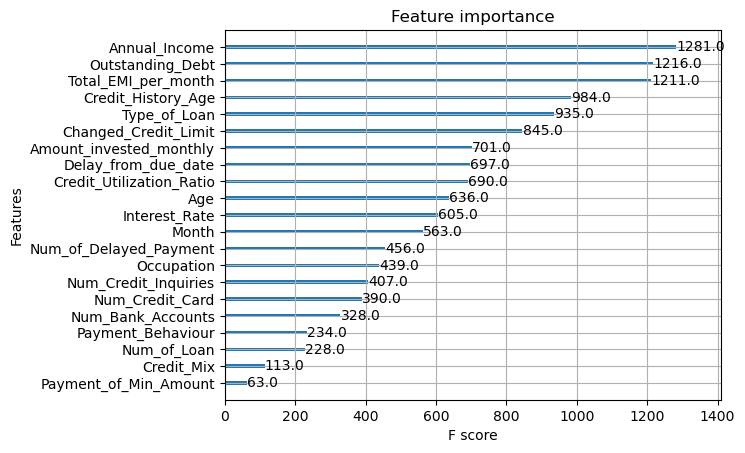

In [7]:
plot_importance(xgb)

In [8]:

# Make predictions on the test data
y_pred = xgb.predict(X_test)

# Calculate the accuracy score of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.7790168120876783


Previously 
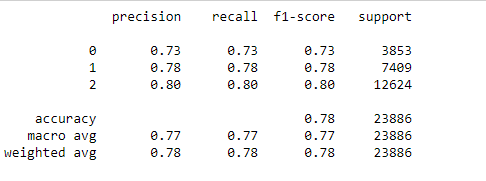

In [9]:
report = classification_report(y_test, y_pred)
print(report )

              precision    recall  f1-score   support

           0       0.71      0.74      0.73      3833
           1       0.78      0.77      0.78      7369
           2       0.80      0.79      0.80     12293

    accuracy                           0.78     23495
   macro avg       0.76      0.77      0.77     23495
weighted avg       0.78      0.78      0.78     23495



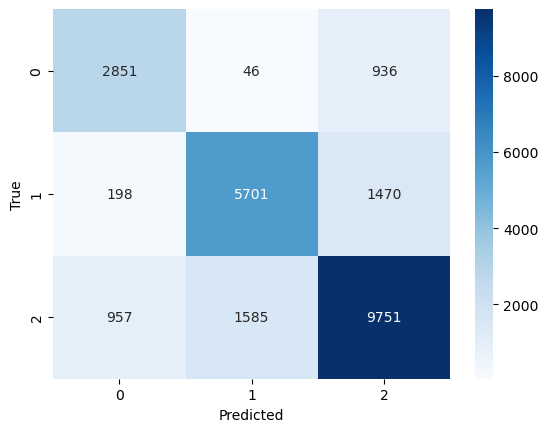

In [10]:
# Assuming y_true contains the true labels and y_pred contains the predicted labels
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [11]:
# So lets try to improve the accuracy by trying to balance the datasets 

In [12]:
df_copy = df.copy() 

In [13]:
df_copy

,Month,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,-1.533495,-0.932368,12,-0.796143,-0.979334,-0.787182,-1.376770,0.005316,128,-1.248565,-1.070927,0.077172,-0.538606,1,-0.590592,-1.054430,0.522998,1,-0.540759,-0.267683,2,0.010108,0
1,-0.659654,-0.932368,12,-0.796143,-0.979334,-0.787182,-1.376770,0.005316,128,-1.248565,-1.070927,0.077172,-0.538606,1,-0.590592,-0.702438,0.542985,1,-0.540759,-0.267056,4,0.010108,0
2,-0.222734,-0.932368,12,-0.796143,-0.979334,-0.787182,-1.376770,0.005316,128,-1.117360,-1.549281,-0.651416,-0.538606,1,-0.590592,-0.157033,0.552979,1,-0.540759,-0.209557,5,0.010108,0
3,0.214187,-0.932368,12,-0.796143,-0.979334,-0.787182,-1.376770,0.005316,128,-1.051758,-1.549281,0.077172,-0.538606,1,-0.590592,-1.453415,0.562973,1,-0.540759,-0.286724,1,0.010108,0
4,0.651107,-0.932368,12,-0.796143,-0.979334,-0.787182,-1.376770,0.005316,128,-0.920553,-1.549281,-0.214263,-0.538606,1,-0.590592,-0.967820,0.572967,1,-0.540759,-0.276465,5,0.010108,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78309,1.524948,-0.369051,1,-0.772437,1.728625,1.126397,1.550005,0.455350,4912,0.719507,1.799198,1.103024,0.743442,0,1.726500,0.978280,-1.375827,2,-0.451970,-0.290023,0,0.010108,2
78310,-1.096574,-0.744596,9,-0.248947,-0.592483,0.169607,-0.926497,-0.894754,683,0.063483,-1.230378,0.110687,-0.795016,1,-0.848669,-0.598796,1.632311,1,-0.653567,-0.218700,4,0.010108,2
78311,0.651107,-0.744596,9,-0.248947,-0.592483,0.169607,-0.926497,-0.894754,683,0.325893,-1.230378,0.110687,-0.795016,1,-0.848669,1.788897,1.672286,1,-0.653567,-0.295216,0,0.010108,1
78312,1.088027,-0.744596,9,-0.248947,-0.592483,0.169607,-0.926497,-0.894754,683,-0.133324,-1.230378,0.110687,-0.795016,1,-0.848669,0.288262,1.682280,1,-0.653567,-0.184061,3,0.010108,2


In [14]:
from sklearn.utils import resample
#create two different dataframe of majority and minority class 
df_majority = df_copy[(df_copy['Credit_Score']==2)] 
df_minority = df_copy[(df_copy['Credit_Score']==1)] 
df_minority2 = df_copy[(df_copy['Credit_Score']==0)] 
# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 41808, # to match majority class
                                 random_state=0)  # reproducible results
df_minority_upsampled2 = resample(df_minority2, 
                                 replace=True,    # sample with replacement
                                 n_samples= 41808, # to match majority class
                                 random_state=0)  # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_minority_upsampled2, df_majority])

In [15]:
df_upsampled = df_upsampled.drop(df.columns[0], axis=1)

1    41808
0    41808
2    41148
Name: Credit_Score, dtype: int64

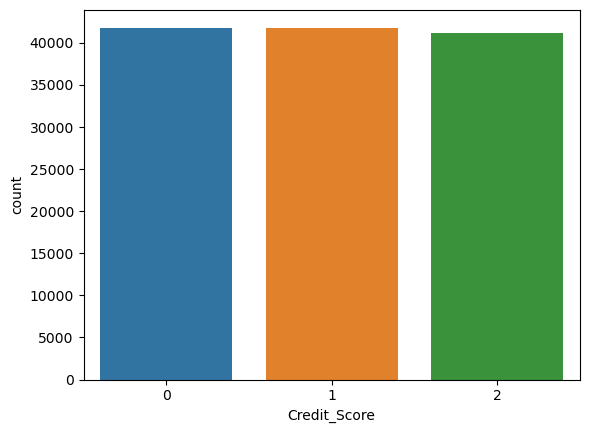

In [16]:
#Counting 1 and 0 Value in Response column
sns.countplot(x = 'Credit_Score', data = df_upsampled)
df_upsampled['Credit_Score'].value_counts()

In [17]:
df2= df_upsampled.copy()

In [18]:
X = df2.drop('Credit_Score', axis=1)
y = df2['Credit_Score']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [20]:
xgb = XGBClassifier(random_state = 0)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [21]:
# Make predictions on the test data
y_pred = xgb.predict(X_test)

# Calculate the accuracy score of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.8212396473417045


In [22]:
report = classification_report(y_test, y_pred)
print(report )

              precision    recall  f1-score   support

           0       0.83      0.92      0.87     12637
           1       0.83      0.87      0.85     12455
           2       0.80      0.68      0.73     12338

    accuracy                           0.82     37430
   macro avg       0.82      0.82      0.82     37430
weighted avg       0.82      0.82      0.82     37430



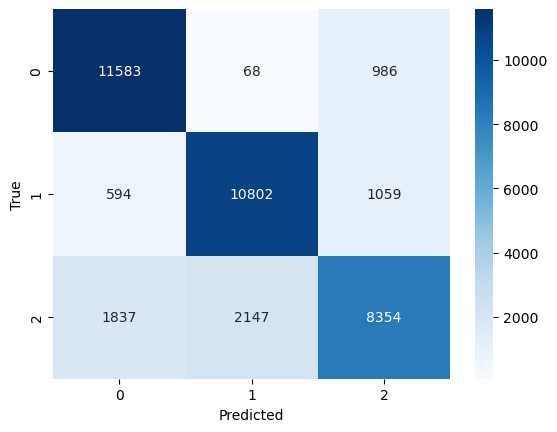

In [23]:

# Assuming y_true contains the true labels and y_pred contains the predicted labels
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()